In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-attack-analysis-prediction-dataset/o2Saturation.csv
/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv


# Introduction


# Objectives

I will develop several models that will predict heart attack using the variables or features. 

Question :
1. What are factors that may contribute to heart attack incidence?
2. Develop model to predict heart attack.


In [2]:
#Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# import the visualization package: seaborn
import seaborn as sns
%matplotlib inline 

In [3]:
#Import the data
path = '/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv'
df = pd.read_csv(path)
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
#Explore the dataset
df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

List of variables and its type :
1. Categorical variables : sex, cp, fbs, restecg, exng, slp, caa, thall, output
2. Numerical variables : age, trtbps chol, fbs, thalachh, oldpeak

In [5]:
df.rename({'cp':'chestpain','trtbps':"restingbloodpressure","chol":"cholesterol","fbs":"fastingbloodsugar","thalachh":"maxheartrate","exng":"angina","oldpeak":"stdepressiondifference","slp":"slope","caa":"vesselscolored"},axis =1,inplace=True)

In [6]:
df.describe()

,age,sex,chestpain,restingbloodpressure,cholesterol,fastingbloodsugar,restecg,maxheartrate,angina,stdepressiondifference,slope,vesselscolored,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'restingbloodpressure'}>],
       [<Axes: title={'center': 'cholesterol'}>,
        <Axes: title={'center': 'fastingbloodsugar'}>],
       [<Axes: title={'center': 'maxheartrate'}>,
        <Axes: title={'center': 'stdepressiondifference'}>]], dtype=object)

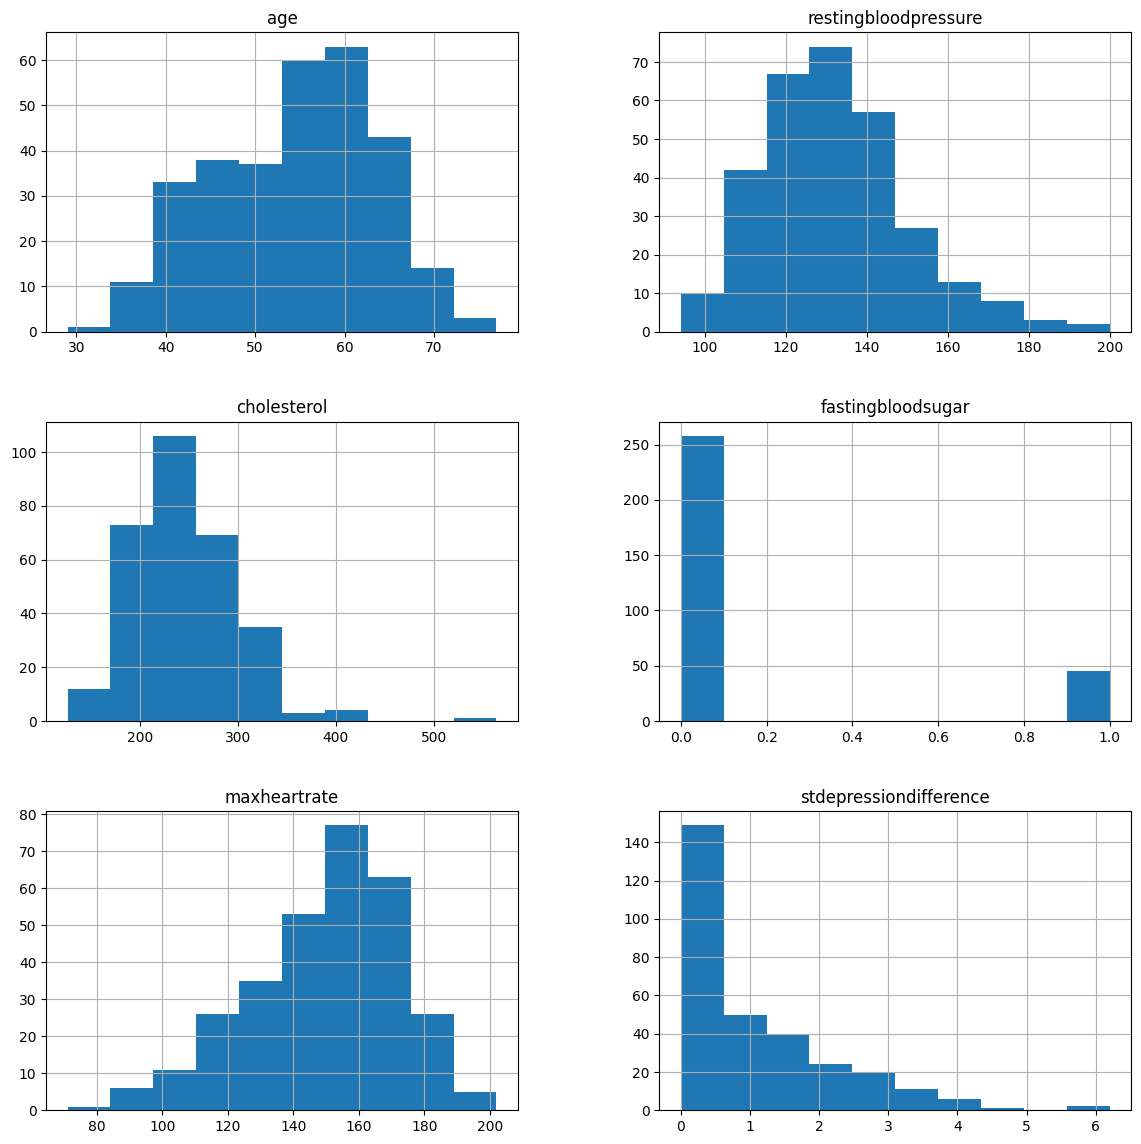

In [7]:
col_num = ['age', 'restingbloodpressure', 'cholesterol','fastingbloodsugar','maxheartrate','stdepressiondifference']
df.hist(column=col_num, figsize=(14, 14))

In [8]:
df[col_num].corr()

,age,restingbloodpressure,cholesterol,fastingbloodsugar,maxheartrate,stdepressiondifference
age,1.000000,0.279351,0.213678,0.121308,-0.398522,0.210013
restingbloodpressure,0.279351,1.000000,0.123174,0.177531,-0.046698,0.193216
cholesterol,0.213678,0.123174,1.000000,0.013294,-0.009940,0.053952
fastingbloodsugar,0.121308,0.177531,0.013294,1.000000,-0.008567,0.005747
maxheartrate,-0.398522,-0.046698,-0.009940,-0.008567,1.000000,-0.344187
stdepressiondifference,0.210013,0.193216,0.053952,0.005747,-0.344187,1.000000


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

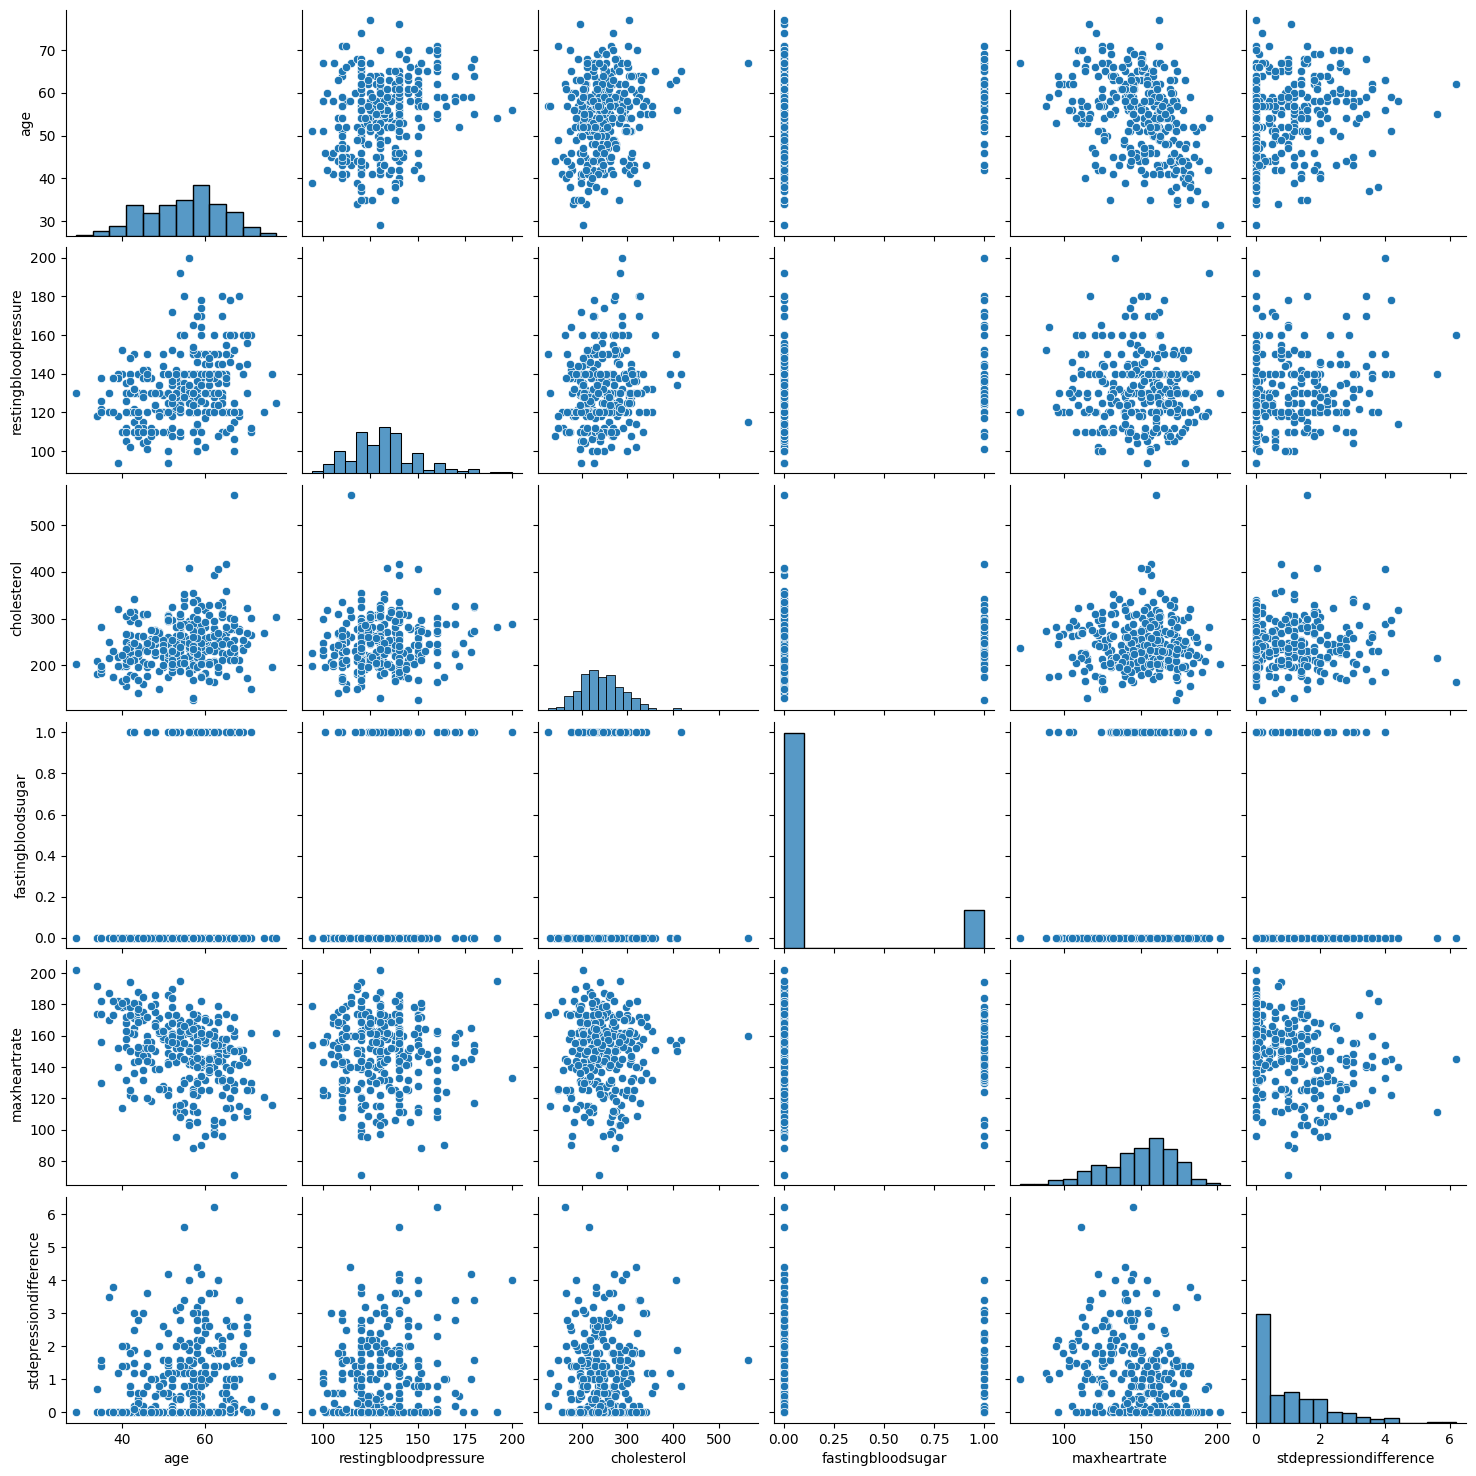

In [9]:
# Create pairplot
sns.pairplot(df[col_num])
plt.show()